<a href="https://colab.research.google.com/github/pranjal-tiwarigithub/AIML/blob/main/stochastic_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

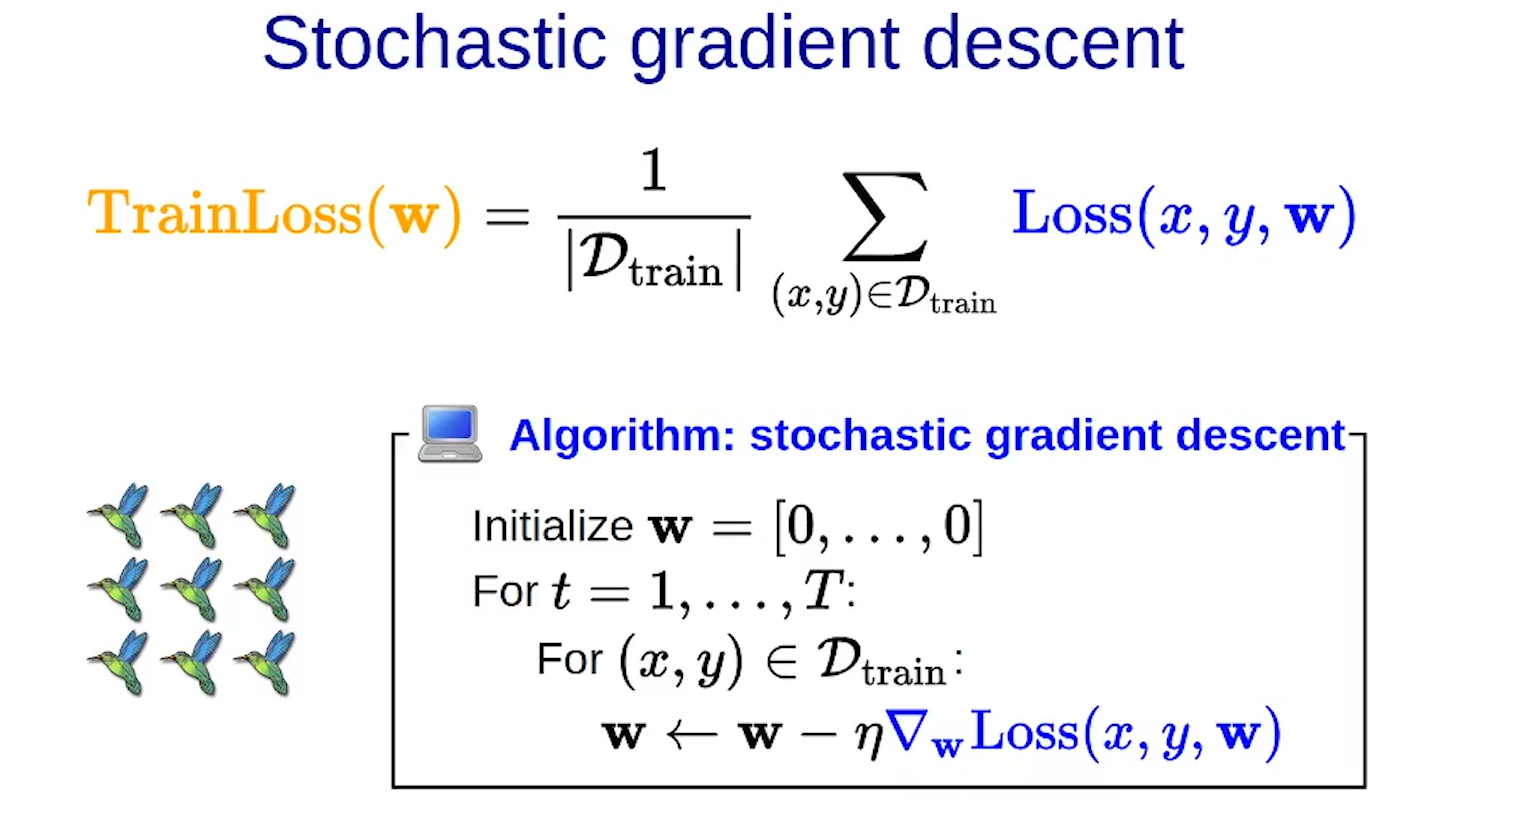

In [36]:
trueW = np.array([1,2,3,4,5])


In [37]:
def generate():
  x = np.random.randn(len(trueW))
  y = trueW.dot(x) + np.random.randn()
  return (x,y)

In [38]:
np.random.randn(3)


array([-0.76014106, -1.44613272,  0.16516522])

In [39]:
train_data = [ generate() for i in range(10000)]

In [40]:
train_data[0]

(array([ 0.55494867, -1.2454881 ,  0.15866955,  1.00253792, -1.01122596]),
 -5.282233478692675)

In [41]:
def feature_vector(x):
  return np.array(x)


In [42]:
def intial_weights():
  return np.zeros(len(trueW))

In [43]:
def train_loss(w):
  return 1/ len(train_data) * sum( (w.dot(feature_vector(x)) - y) ** 2 for x,y in train_data )

In [44]:
def gradient(w):
  return 1/len(train_data) * sum(2* ( w.dot(feature_vector(x)) - y ) * feature_vector(x) for x,y in train_data)

In [45]:
def gradient_descent(intial_weights , train_loss , gradient ):
  w = intial_weights()
  eta = 0.1
  for i in range(200):
    train_loss_val = train_loss(w)
    gradient_val = gradient(w)
    w = w - eta * gradient(w)
    print(f"epoch {i} loss {train_loss_val} gradient {gradient_val} weights {w} ")

In [46]:
gradient_descent(intial_weights , train_loss , gradient )


epoch 0 loss 56.720049727187515 gradient [ -1.99212536  -3.8685988   -6.28066744  -8.01085399 -10.14423781] weights [0.19921254 0.38685988 0.62806674 0.8010854  1.01442378] 
epoch 1 loss 36.455551569953606 gradient [-1.60498416 -3.12117265 -4.96855374 -6.40890028 -8.08446393] weights [0.35971095 0.69897715 1.12492212 1.44197543 1.82287017] 
epoch 2 loss 23.563109699388846 gradient [-1.29303326 -2.51781947 -3.93006196 -5.12748054 -6.44321952] weights [0.48901428 0.95075909 1.51792831 1.95472348 2.46719213] 
epoch 3 loss 15.359998133393713 gradient [-1.04167958 -2.03083952 -3.10822532 -4.10242226 -5.13540441] weights [0.59318224 1.15384304 1.82875085 2.36496571 2.98073257] 
epoch 4 loss 10.140045603740832 gradient [-0.83915997 -1.6378432  -2.45791977 -3.28240793 -4.0932335 ] weights [0.67709823 1.31762736 2.07454282 2.6932065  3.39005592] 
epoch 5 loss 6.818047489938882 gradient [-0.6759929  -1.32073644 -1.94340534 -2.6263985  -3.26271141] weights [0.74469752 1.44970101 2.26888336 2.9558

In [47]:
def stochastic_loss(w,i):
  x,y=train_data[i]
  return (w.dot(feature_vector(x)) - y) ** 2

In [53]:
def stochastic_loss_gradient(w,i):
  x,y = train_data[i]
  return 2 * (w.dot(feature_vector(x)) - y ) * feature_vector(x)

In [49]:
import math

In [71]:
def stochastic_gradientdescent(stochastic_loss , stochastic_loss_gradient , intial_weights, n):
  w = intial_weights()
  number_updates = 0
  for j in range(50):
    for i in range(n):
      loss = stochastic_loss(w,i)
      gradient = stochastic_loss_gradient(w,i)
      number_updates = number_updates + 1
      eta = 1.0 / math.sqrt(number_updates)
      w = w - eta * gradient
    print(f"epoch {j} loss {loss} gradient {gradient} weights {w} ")


In [72]:
stochastic_gradientdescent(stochastic_loss , stochastic_loss_gradient , intial_weights, len(train_data))


epoch 0 loss 4.168452010730432 gradient [ 4.71499864  0.46475387 -0.15475067 -2.82013134  0.9210726 ] weights [1.11724239 2.05436831 3.02917189 3.99767678 4.99388287] 
epoch 1 loss 4.254839231711349 gradient [ 4.76360504  0.46954496 -0.15634598 -2.84920377  0.93056784] weights [1.13660669 2.03933042 3.04784819 3.96010377 4.98071966] 
epoch 2 loss 4.281920634764002 gradient [ 4.7787408   0.47103689 -0.15684275 -2.85825676  0.9335246 ] weights [1.1448674  2.03059944 3.04972248 3.94743353 4.97729587] 
epoch 3 loss 4.289944602360277 gradient [ 4.78321619  0.47147802 -0.15698964 -2.86093357  0.93439887] weights [1.14876414 2.02493596 3.04804403 3.94141345 4.97653935] 
epoch 4 loss 4.289580185507381 gradient [ 4.78301303  0.471458   -0.15698297 -2.86081206  0.93435918] weights [1.15050693 2.02084747 3.04536774 3.93807007 4.97679264] 
epoch 5 loss 4.284998832961328 gradient [ 4.78045817  0.47120617 -0.15689912 -2.85928395  0.93386009] weights [1.15106726 2.01766688 3.0424485  3.93605977 4.977

In [57]:
def loss(w, i):
    x, y = train_data[i]
    return (w.dot(feature_vector(x)) - y)**2

def gradientLoss(w, i):
    x, y = train_data[i]
    return 2 * (w.dot(feature_vector(x)) - y) * feature_vector(x)

In [69]:
def stochasticGradientDescent(f, gradientf, n, initialWeightVector):
    w = initialWeightVector()
    numUpdates = 0
    for t in range(50):
        for i in range(n):
            value = f(w, i)
            gradient = gradientf(w, i)
            numUpdates += 1
            eta = 1.0 / math.sqrt(numUpdates)
            w = w - eta * gradient
        print(f'epoch {t}: w = {w}, F(w) = {value}, gradientF = {gradient}')

In [70]:
stochasticGradientDescent(loss, gradientLoss, len(train_data), intial_weights)

epoch 0: w = [1.11724239 2.05436831 3.02917189 3.99767678 4.99388287], F(w) = 4.168452010730432, gradientF = [ 4.71499864  0.46475387 -0.15475067 -2.82013134  0.9210726 ]
epoch 1: w = [1.13660669 2.03933042 3.04784819 3.96010377 4.98071966], F(w) = 4.254839231711349, gradientF = [ 4.76360504  0.46954496 -0.15634598 -2.84920377  0.93056784]
epoch 2: w = [1.1448674  2.03059944 3.04972248 3.94743353 4.97729587], F(w) = 4.281920634764002, gradientF = [ 4.7787408   0.47103689 -0.15684275 -2.85825676  0.9335246 ]
epoch 3: w = [1.14876414 2.02493596 3.04804403 3.94141345 4.97653935], F(w) = 4.289944602360277, gradientF = [ 4.78321619  0.47147802 -0.15698964 -2.86093357  0.93439887]
epoch 4: w = [1.15050693 2.02084747 3.04536774 3.93807007 4.97679264], F(w) = 4.289580185507381, gradientF = [ 4.78301303  0.471458   -0.15698297 -2.86081206  0.93435918]
epoch 5: w = [1.15106726 2.01766688 3.0424485  3.93605977 4.97747472], F(w) = 4.284998832961328, gradientF = [ 4.78045817  0.47120617 -0.15689912